<h1 style="background-color:rgba(203, 35, 23, 0.92); font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Obesity Risk Prediction</b>
</h1>

**Dataset Overview**

This notebook aims to analyze and predict obesity levels based on lifestyle, dietary habits, and personal characteristics.

**Key Features**  

- **id:** Unique identifier for each individual in the dataset.  
- **Gender:** Biological sex of the individual (Male/Female).  
- **Age:** Age of the person (years).  
- **Height:** Height of the individual (meters).  
- **Weight:** Weight of the individual (kilograms).  
- **family_history_with_overweight:** Indicates if obesity runs in the family (Yes/No).  
- **FAVC:** Frequent consumption of high-calorie food (Yes/No).  
- **FCVC:** Frequency of vegetable consumption (Scale: 1-3).  
- **NCP:** Number of main meals consumed daily.  
- **CAEC:** Frequency of food consumption between meals (Never/Sometimes/Frequently/Always).  
- **SMOKE:** Indicates if the person smokes (Yes/No).  
- **CH2O:** Daily water intake (liters).  
- **SCC:** Whether the person monitors their calorie intake (Yes/No).  
- **FAF:** Frequency of physical activity (Scale: 0-3).  
- **TUE:** Time spent using electronic devices daily (hours).  
- **CALC:** Alcohol consumption frequency (Never/Sometimes/Frequently/Always).  
- **MTRANS:** Mode of transportation (Public Transport/Walking/Automobile/Bike).  
- **NObeyesdad:** Target variable - obesity classification (Normal Weight, Overweight, Obese, etc.).  


# `01` Import Libraries

In [1]:
import numpy as np
import math 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from collections import Counter

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/competitions/playground-series-s4e2/data)

In [2]:
train = pd.read_csv('../data/train.csv')    
test = pd.read_csv('../data/test.csv')  

In [3]:
df = train.copy()
print(df.shape)    
df.head()


(20758, 18)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# `03` Simple Analysis & Exploratory Data Analysis (EDA) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
# There is No Null Values  
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


In [8]:
# There is No Duplicates
df.duplicated().sum()    

0

In [9]:
df.nunique()    

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [10]:
# i will make the NCP column with 8 values only by rounding the values to the nearest 0.5

# Function to round values to the nearest 0.5
def round_to_half(value):
    return round(value * 2) / 2

# columns to Apply rounding function
cols = ['NCP', 'FCVC', 'CH2O','FAF']

for col in cols:
    df[col] = df[col].apply(round_to_half)


<h1> Univariate Analysis (Single Variable)</h1>

<b>This dataset appears to be imbalanced because the percentage distribution of the classes is not uniform. 
 Some categories, such as Obesity_Type_III (19.5%), have a significantly higher proportion compared to others, 
 like Overweight_Level_I (11.7%) and Overweight_Level_II (12.1%). <br> SO When making the model we will make the data balanced <b>

<Axes: ylabel='count'>

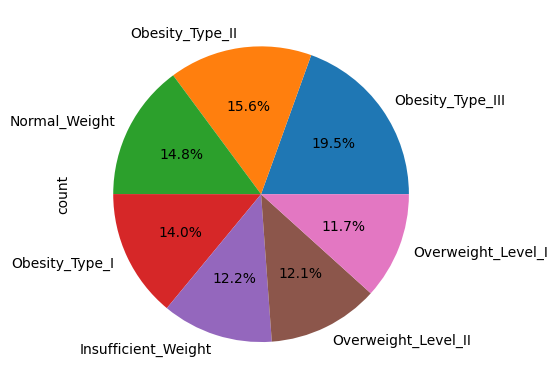

In [11]:
df["NObeyesdad"].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='count'>

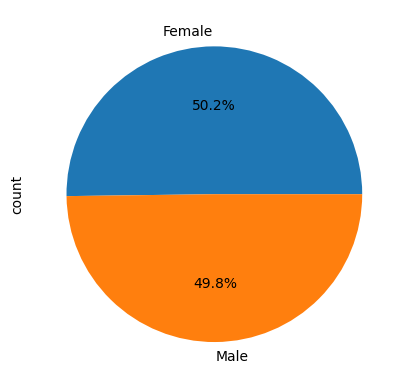

In [12]:
df["Gender"].value_counts().plot.pie(autopct='%1.1f%%')

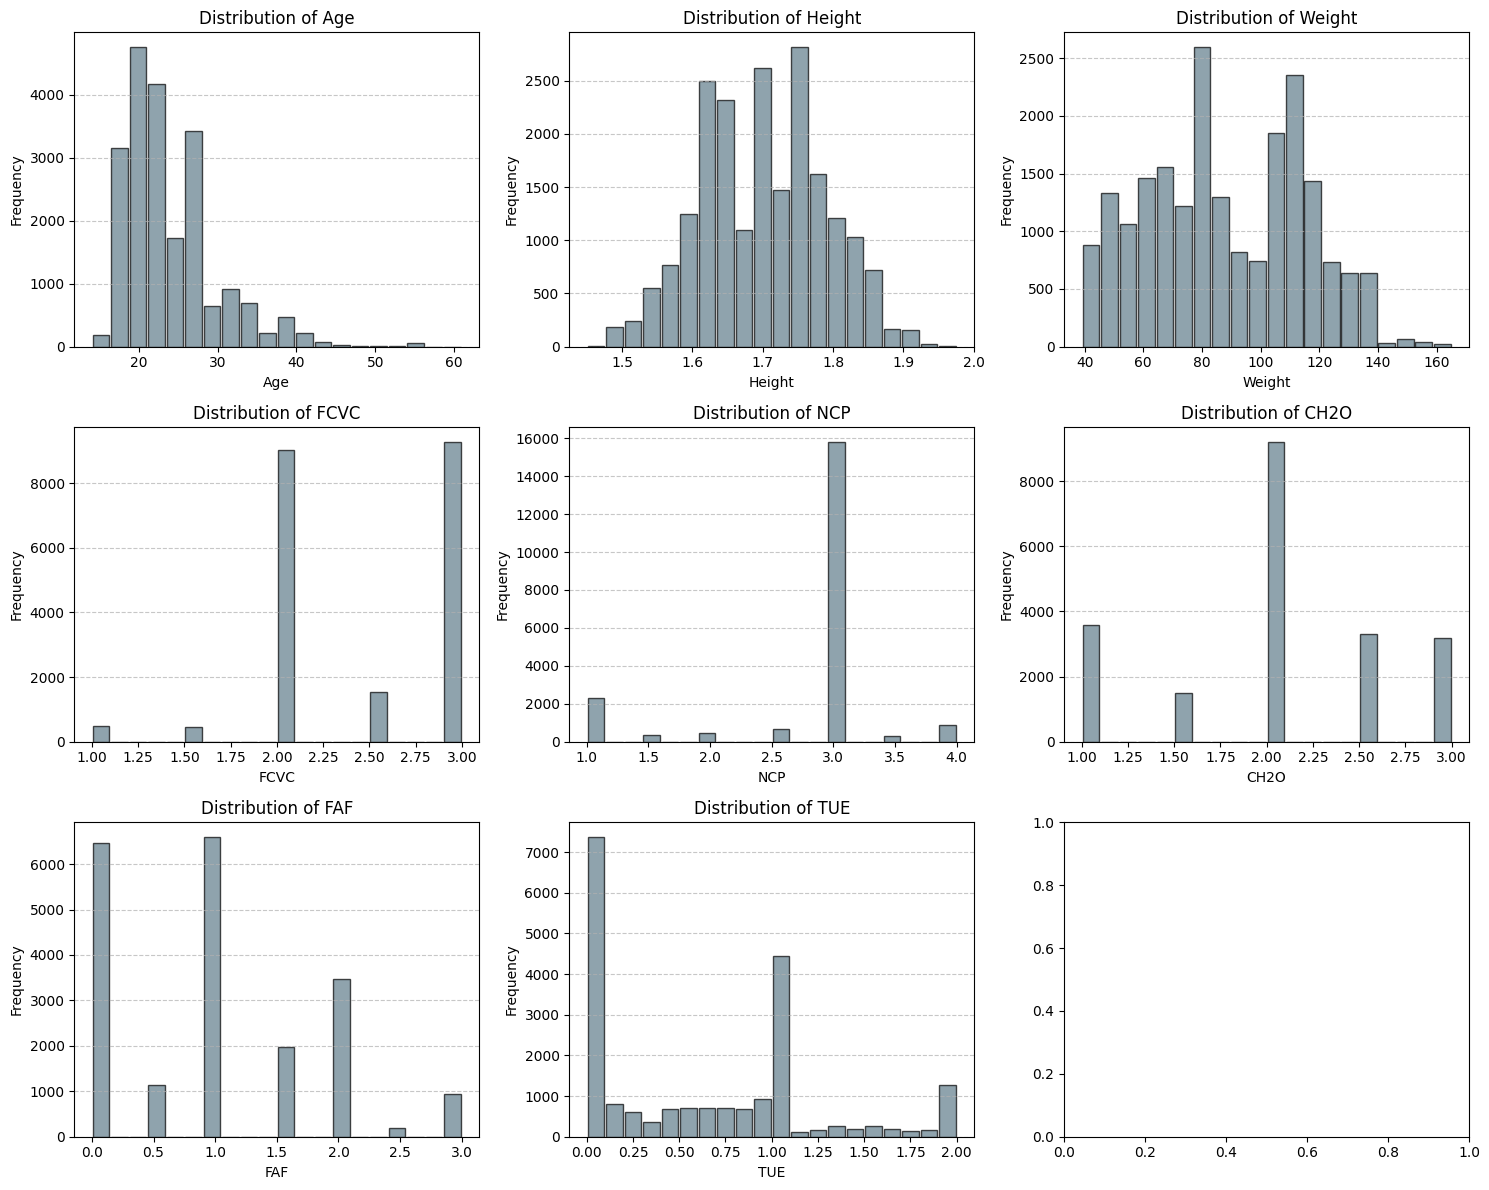

In [13]:
# apply hist plot to get the distribution of each column
columns_hist = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid layout

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns_hist):
    axes[i].hist(df[col], bins=20, color='#607D8B', edgecolor='black', alpha=0.7, rwidth=0.9)
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Adjust layout for better spacing
plt.tight_layout()   # prevent overlapping labels and titles , making a clean and well-organized figure 
plt.show()


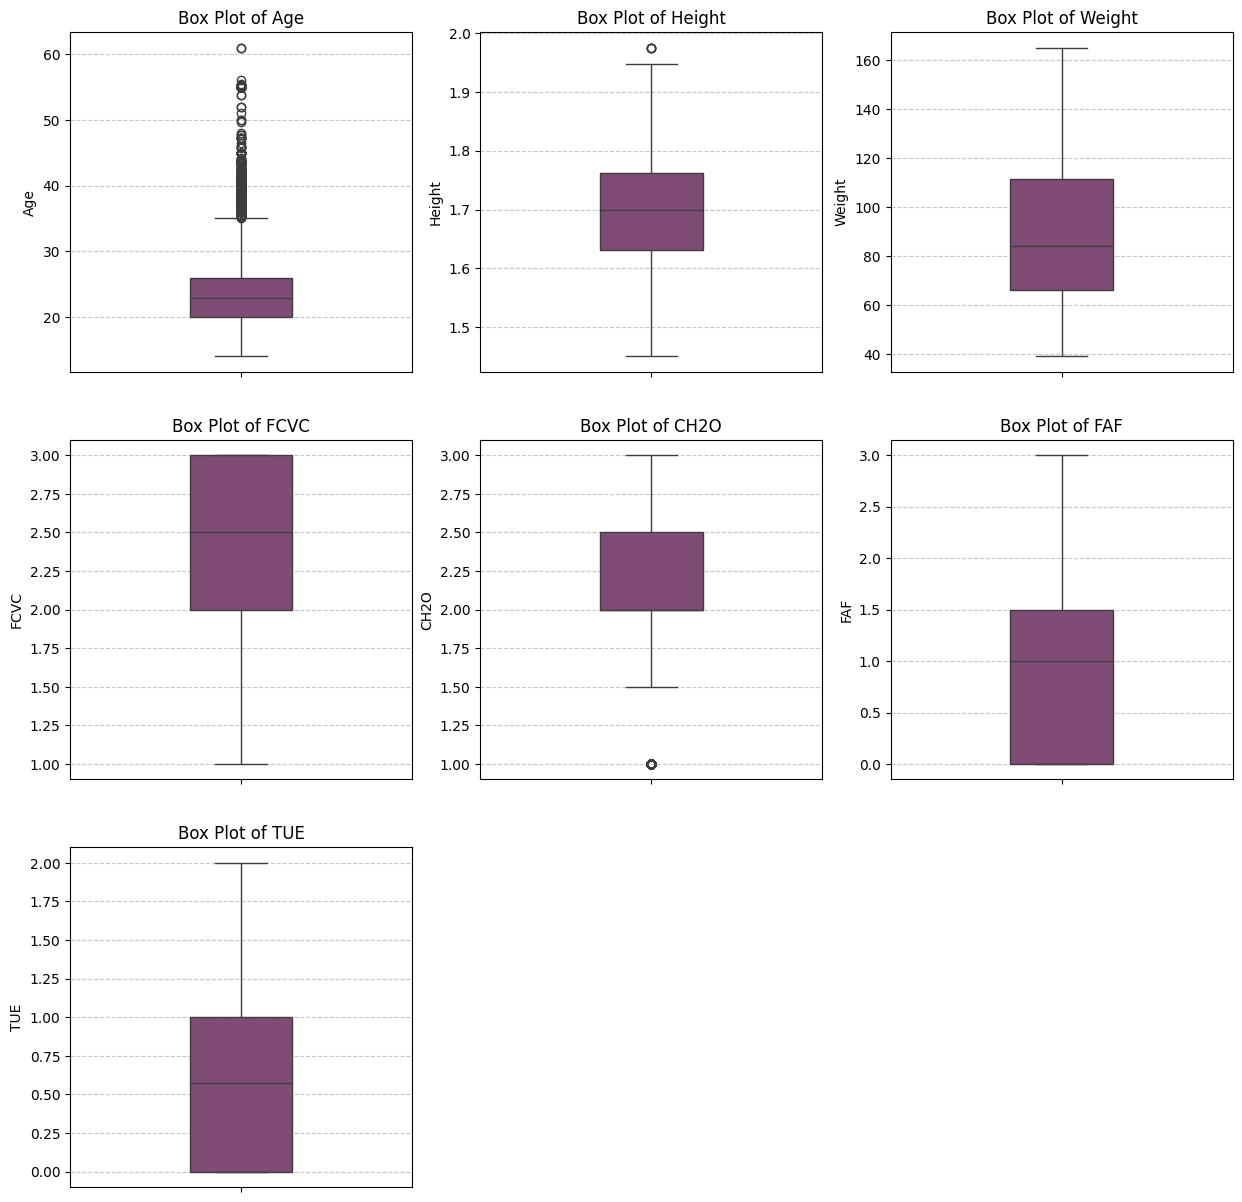

In [14]:
# Making Box plots to identify outliers

# List of columns for box plots
columns_box = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Determine the grid size dynamically
num_cols = len(columns_box)
rows = math.ceil(num_cols / 3)  # 3 columns per row

# Set up the figure
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten axes for easy iteration

# Create box plots using Seaborn
for i, col in enumerate(columns_box):
    sns.boxplot(y=df[col], ax=axes[i], color='#87447B', width=0.3)
    axes[i].set_title(f"Box Plot of {col}", fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)           # Add grid for better readability

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.subplots_adjust()
plt.show()


<h2> Interpretation of Each Variable in the Box plot </h2>

<B>
(a) Age
The median age is around 20-25 years.
Several outliers exist above 40 years, indicating some significantly older individuals in the dataset.

(b) Height
The majority of heights fall between 1.6m and 1.8m.
There is one outlier above 1.9m, possibly indicating an exceptionally tall person.

(c) Weight
The weight distribution is fairly normal.
Some extreme values are observed above 160 kg, suggesting overweight individuals in the dataset.

(d) FCVC (Frequency of Vegetable Consumption)
The values range between 1.0 and 3.0, which seems normally distributed.
No significant outliers.

(f) CH2O (Daily Water Intake)
Most individuals drink between 1.5 to 2.5 liters per day.
No significant outliers.

(g) FAF (Physical Activity Frequency)
Most individuals engage in some level of physical activity, typically between 0 and 3 hours per week.
No major outliers.

(h) TUE (Time Using Electronic Devices)
The median TUE value is quite low.
The range suggests limited electronic device usage.
<B>

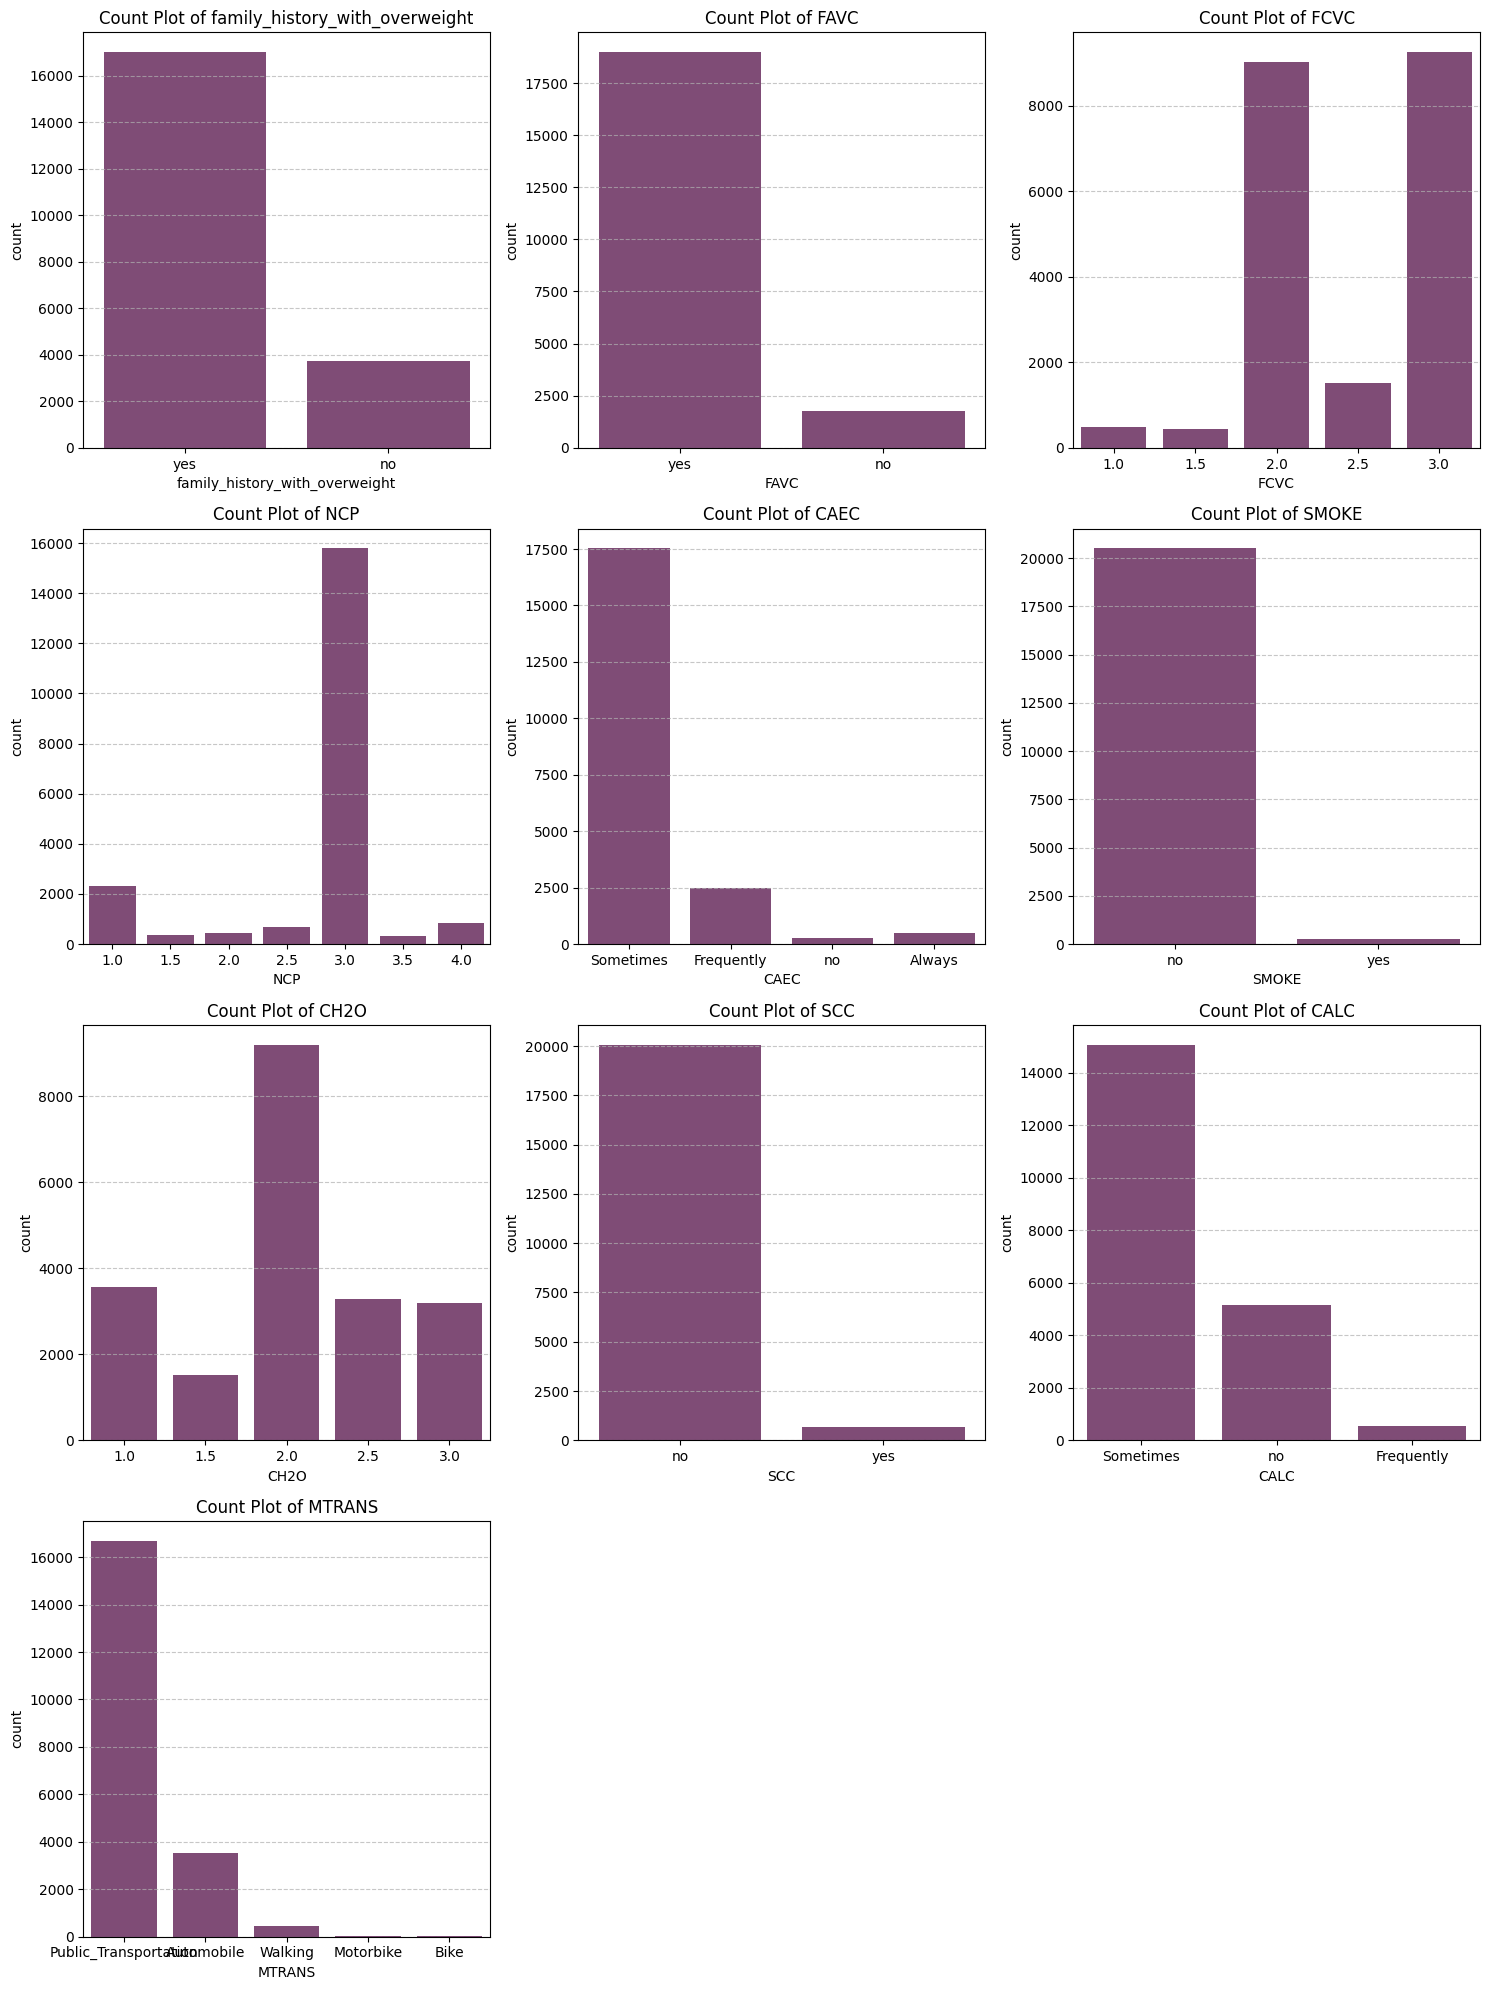

In [15]:
# apply count plot to get the distribution of each categorical column   

columns_cat = ['family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'CALC','MTRANS']

# Determine the grid size dynamically
num_cols = len(columns_cat)
rows = math.ceil(num_cols / 3)  # 3 columns per row

# Set up the figure
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten axes for easy iteration

# Create count plots using Seaborn
for i, col in enumerate(columns_cat):
    sns.countplot(x=df[col], ax=axes[i], color='#87447B')
    axes[i].set_title(f"Count Plot of {col}", fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)           # Add grid for better readability

# Hide empty subplots if any    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing    
plt.tight_layout()
plt.show()

<h1> Bivariate Analysis<h1>

In [16]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.0,3.0,Sometimes,no,3.0,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.0,3.0,Frequently,no,2.0,no,1.0,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,2.0,1.5,Sometimes,no,2.0,no,1.0,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.0,3.0,Sometimes,no,1.5,no,1.5,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.5,2.0,Sometimes,no,2.0,no,2.0,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


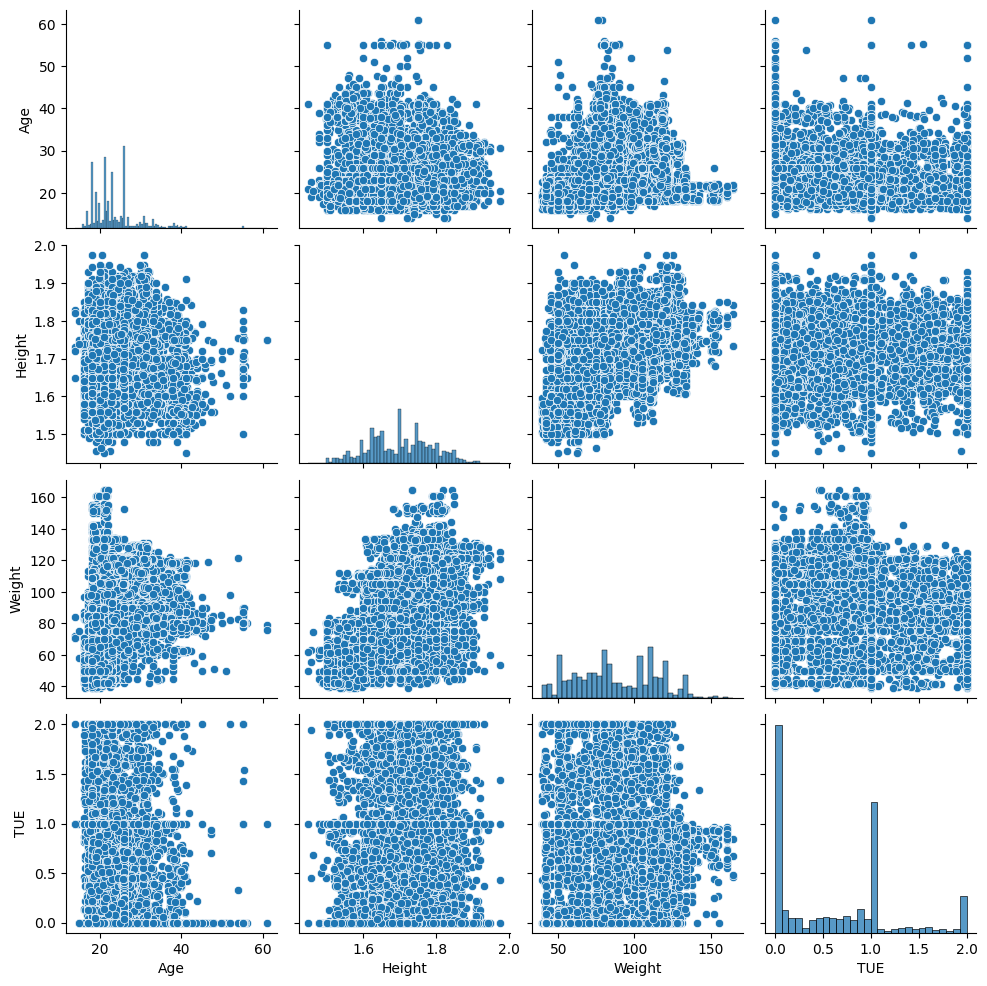

In [17]:
# for the numerical columns 
#  Scatter Plots & Correlation Heatmaps
#        Helps identify linear/non-linear relationships between numerical features.


num_cols = ['Age', 'Height', 'Weight', 'TUE']

# Pairplot
sns.pairplot(df[num_cols])
plt.show()

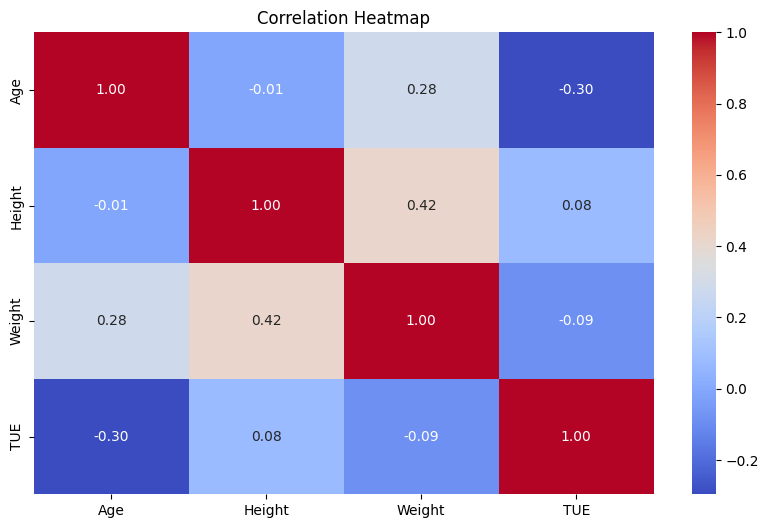

In [18]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

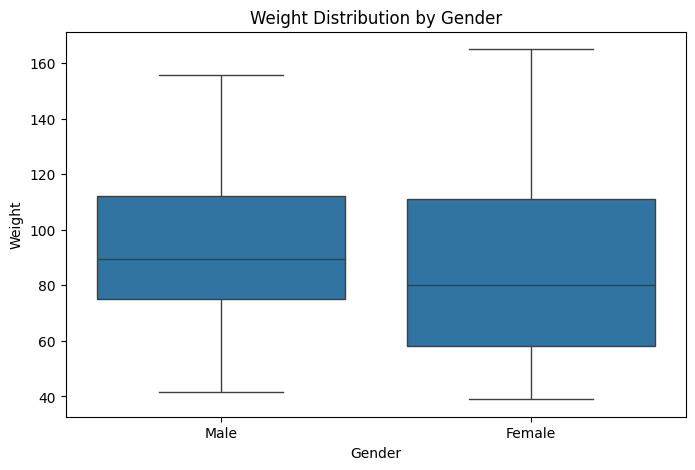

In [19]:
# Box Plot for Gender vs. Weight
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Gender'], y=df['Weight'])
plt.title("Weight Distribution by Gender")
plt.show()

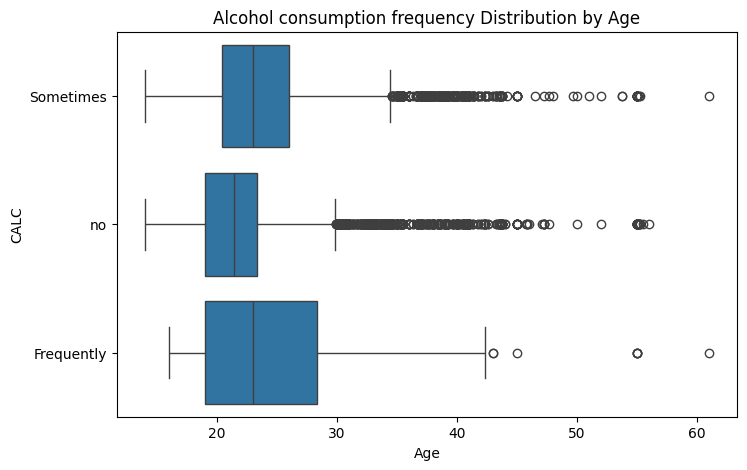

In [20]:
# Box Plot for Gender vs. Weight
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'], y=df['CALC'])
plt.title("Alcohol consumption frequency Distribution by Age")
plt.show()

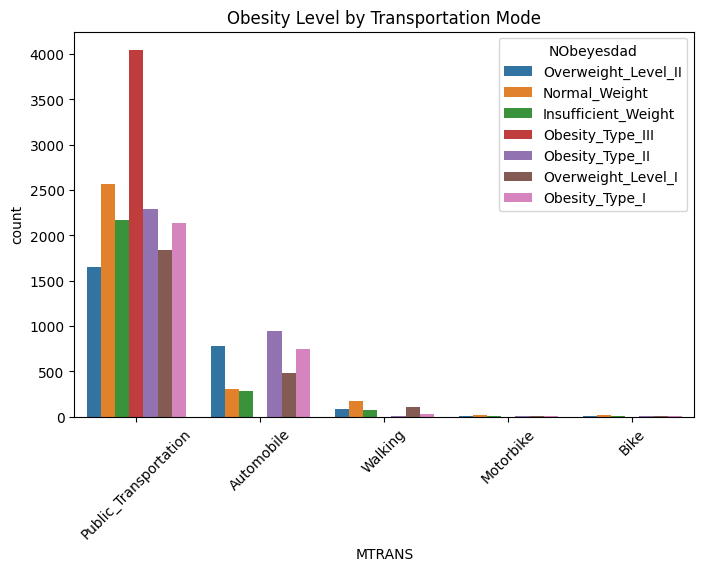

In [21]:
# Count Plot - Transportation Mode vs Obesity Level
plt.figure(figsize=(8, 5))
sns.countplot(x=df['MTRANS'], hue=df['NObeyesdad'])
plt.title("Obesity Level by Transportation Mode")
plt.xticks(rotation=45)
plt.show()


<b>We can See That <br>
1 - Obesity Type III is more prevalent in females.<br>
2 - Obesity Type II is more common in males.<br>
3 - Insufficient conditions appear more frequently in females.<br>
4 - Overweight and normal weight categories show a more balanced distribution between genders.<b>

In [22]:
px.histogram(df, x="NObeyesdad",color="Gender",barmode="group", height=500, width=1000, title="Distribution of Gender by NObeyesdad")

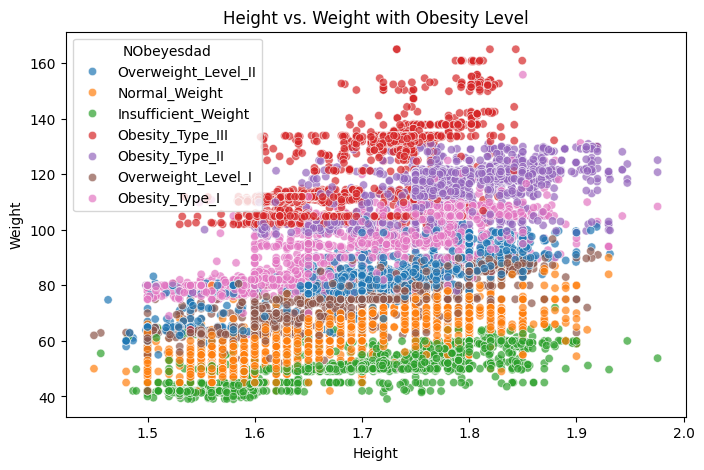

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['NObeyesdad'], alpha=0.7)
plt.title("Height vs. Weight with Obesity Level")
plt.show()

# `04` Data Preprocessing

In [24]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.0,3.0,Sometimes,no,3.0,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.0,3.0,Frequently,no,2.0,no,1.0,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,2.0,1.5,Sometimes,no,2.0,no,1.0,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.0,3.0,Sometimes,no,1.5,no,1.5,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.5,2.0,Sometimes,no,2.0,no,2.0,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [25]:
df.drop('id', axis=1, inplace=True) 

In [26]:
x = df.drop('NObeyesdad', axis=1)   
y = df['NObeyesdad']

In [27]:
# train test split  
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=.15, random_state=99,stratify=y)

In [28]:
# now we will make an Encoding for Columns 
# 1 - Making a Label Encoding for Gender , family_history_with_overweight , FAVC , SMOKE , SCC
# Because it is Binary categorical, so Label Encoding is the simplest choice. 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder



label_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
label_encoders = {}    # Dictionary to store encoders for later use (e.g., inverse transform)

for col in label_columns:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    label_encoders[col] = le  # Store encoder for later use
    x_valid[col] = le.transform(x_valid[col])



# 2 - making ordinal Encoding for CAEC , CALC , NObeyesdad >>> because There is a natural order 
CAEc_Encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
x_train[['CAEC']] = CAEc_Encoder.fit_transform(x_train[['CAEC']])
x_valid[['CAEC']] = CAEc_Encoder.transform(x_valid[['CAEC']])

CALc_Encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently']])
x_train[['CALC']] = CALc_Encoder.fit_transform(x_train[['CALC']])
x_valid[['CALC']] = CALc_Encoder.transform(x_valid[['CALC']])


NObeyesdad_Encoder = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
y_train = NObeyesdad_Encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_valid = NObeyesdad_Encoder.transform(y_valid.to_numpy().reshape(-1, 1))


# 3 - MTRANS >> one hot encoding >> because there is no natural order   
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
# Fit and transform on training data
encoded_train = onehot_encoder.fit_transform(x_train[['MTRANS']])
encoded_valid = onehot_encoder.transform(x_valid[['MTRANS']])
# Convert to DataFrame and add proper column names
encoded_train_df = pd.DataFrame(encoded_train, columns=onehot_encoder.get_feature_names_out(['MTRANS']))
encoded_valid_df = pd.DataFrame(encoded_valid, columns=onehot_encoder.get_feature_names_out(['MTRANS']))
# Reset index to match x_train and x_valid
encoded_train_df.index = x_train.index
encoded_valid_df.index = x_valid.index
# Drop the original column and concatenate the new encoded columns
x_train = x_train.drop(columns=['MTRANS']).join(encoded_train_df)
x_valid = x_valid.drop(columns=['MTRANS']).join(encoded_valid_df)


In [29]:
# i will apply StandardScaler to normalize the data on Age ,weight >> because it is Almost normally distributed 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[['Age', 'Weight']] = scaler.fit_transform(x_train[['Age', 'Weight']])
x_valid[['Age', 'Weight']] = scaler.transform(x_valid[['Age', 'Weight']])

In [30]:
y_train = y_train.ravel()
y_valid = y_valid.ravel()

<b>As we Know that our data is Not Balanced So we will Apply SMOTE to make oversampling Using KNN model</b>

In [31]:
# # check the distribution before SMOTE
# print("Before SMOTE:",Counter(y_train.ravel()))

# # Apply SMOTE in training set only to avoid leakage
# # i made the other classes to be 88% of the majority class >> to avoid overfitting as we can 
# smote = SMOTE(sampling_strategy="auto",random_state=99)
# x_train, y_train = smote.fit_resample(x_train, y_train)

# # Check distribution after SMOTE
# print("After SMOTE:", Counter(y_train.ravel()))

# `05` Model Selection & Training

In [32]:
# we will apply a lot of classifiers and find the best one  
# 1 - Logistic Regression 

# Hyperparameter Tuning
# i made multi_class = "multinomial" because we have more than two classes and by default it is "ovr" >> one-vs-rest if not a binary classification and the difference that ovr make a lot of logistic regression models >>> but multinomial apply softmax AF instead of sigmoid to make a multi class prediction 
logreg = LogisticRegression(multi_class='multinomial',C=1,solver="saga",penalty="l1",max_iter=2000,random_state=99)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.857096981374438


In [33]:
# grid search to find the best hyperparameters on the logistic regression model

# param_grid = {
#     'C': [0.01,0.1, 1, 10],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'l1_ratio': [0.1, 0.5, 0.9],}

# grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# grid_search.fit(x_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_model = grid_search.best_estimator_    
# y_pred = best_model.predict(x_valid)
# accuracy = accuracy_score(y_valid, y_pred)
# print("Accuracy:", accuracy)


# Best Hyperparameters: {'C': 1, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}
# Accuracy: 0.857096981374438

In [34]:
# applying Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=99)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.896917148362235


In [35]:
# applying Decision Tree 
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=99)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8397559409120102


In [36]:
# applying Naive Bayes 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6313423249839435


In [37]:
# applying KNN 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

c:\Users\aliay\OneDrive\Desktop\Github-zone\ML-Project-Obesity-Risk\env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\aliay\OneDrive\Desktop\Github-zone\ML-Project-Obesity-Risk\env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\aliay\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\aliay\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aliay\AppData\Local\Programs\Python\P

Accuracy: 0.7825947334617854


In [38]:
# applying SVM 
from sklearn.svm import SVC

svm = SVC(random_state=99)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.848747591522158
